<a href="https://colab.research.google.com/github/Razany98/Deception-Detection-Arabic-Dataset/blob/main/Deception_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering

In [ ]:
#@title Import Plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import librosa
import librosa.display
import IPython
from IPython.display import Audio


audio_path ='/content/drive/MyDrive/Pinocchio_2022/WAV_Data set/Truth/F_121_T.wav'
data, rate = librosa.load(audio_path)

Audio(data, rate=rate)

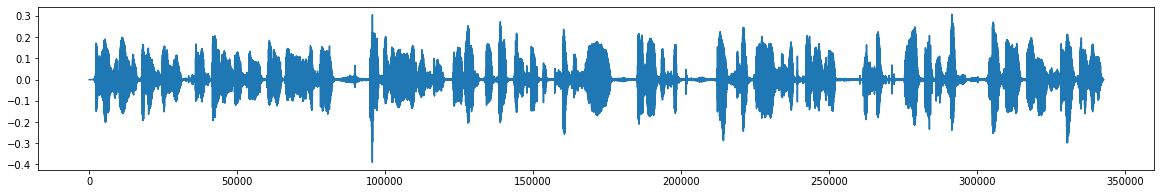

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

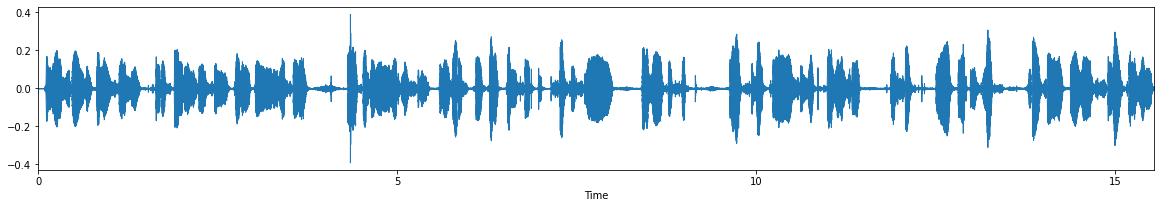

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
librosa.display.waveplot(data,sr=rate, x_axis='time');

## Logmel-spectogram
A very common preprocessing technique in audio detection applications is to transform audios to its log mel-spectogram representation. Some concepts here: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

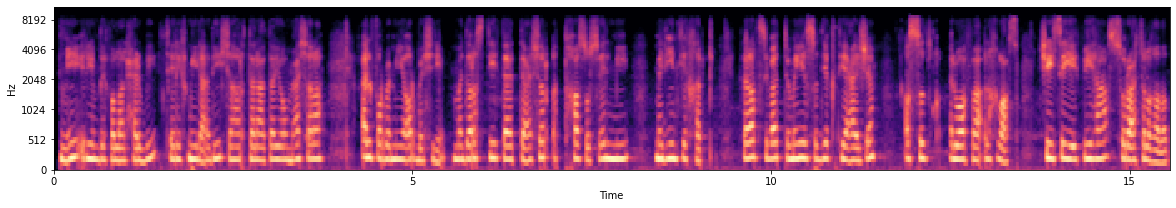

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))

S1 = librosa.feature.melspectrogram(y=data, sr=rate, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel');

The differences become very clear in the log mel spectogram. In the fist case, you can see a lot of artefacts on low frequencies (not birds), and the birds are in levels below the background noises. Besides, background noises are higher in frequencies below 2 kHz.

## Filtering low-frequencies
As we noticed, low frequencies does not contribute to bird sounds, a first idea is to remove these low frequencies. A high pass filter helps in this task. Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

In [ ]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:
figg = f_high(data, rate)

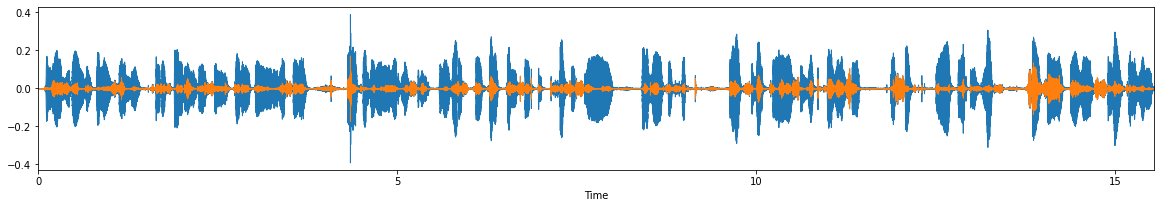

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))

librosa.display.waveplot(data,sr=rate, x_axis='time');
librosa.display.waveplot(figg,sr=rate, x_axis='time');

## Non-stationary noise reduction
(Noise Recogention)

In [ ]:
pip install noisereduce

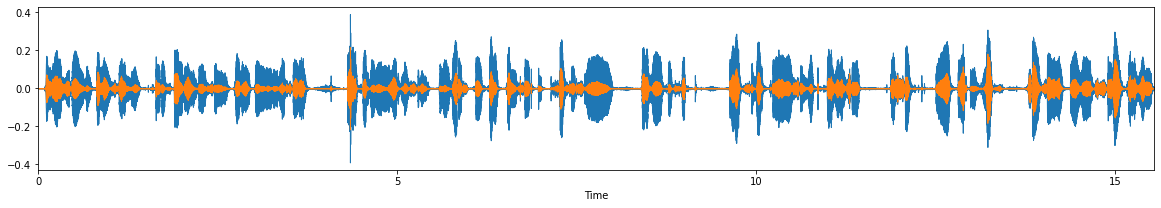

In [ ]:
import noisereduce as nr

reduced_noise = nr.reduce_noise(y = data, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

fig, ax = plt.subplots(figsize=(20,3))
librosa.display.waveplot(data,sr=rate, x_axis='time');
librosa.display.waveplot(reduced_noise,sr=rate, x_axis='time');

IPython.display.Audio(data=reduced_noise, rate=rate)

## Creating Loop Over Data
The below code will generate loop over the data which contains two files one for Lie and the other for Truth


In [ ]:
import os

In [ ]:
PATH = '/content/drive/MyDrive/Pinocchio_2022/WAV_Data set'

os.listdir(PATH)

['Truth', 'Lie']

The above code shows the folders that contains in side the path

In [ ]:
pip install split-folders

In [ ]:
import splitfolders


input_folder = '/content/drive/MyDrive/Pinocchio_2022/WAV_Data set'
a = splitfolders.ratio(input_folder, output='dataset/', seed=42, ratio=(.8,.2), group_prefix=None)

Copying files: 201 files [00:03, 52.92 files/s]


In [ ]:
lie_dir = os.path.join(PATH, 'Lie')
truth_dir = os.path.join(PATH, 'Truth')

print(len(os.listdir(lie_dir))) 
print(len(os.listdir(truth_dir)))        
print(os.listdir(lie_dir))
print(os.listdir(truth_dir))

100
101
['F_007_L.wav', 'F_009_L.wav', 'F_008_L.wav', 'F_006_L.wav', 'F_013_L.wav', 'F_021_L.wav', 'F_011_L.wav', 'F_012_L.wav', 'F_120_L.wav', 'F_121_L.wav', 'F_122_L.wav', 'F_123_L.wav', 'F_124_L.wav', 'F_125_L.wav', 'M_126_L.wav', 'F_128_L.wav', 'F_127_L.wav', 'F_129_L.wav', 'F_130_L.wav', 'F_131_L.wav', 'F_132_L.wav', 'F_133_L.wav', 'F_134_L.wav', 'F_135_L.wav', 'F_136_L.wav', 'F_137_L.wav', 'F_138_L.wav', 'F_139_L.wav', 'F_061_L.wav', 'F_062_L.wav', 'F_064_L.wav', 'F_065_L.wav', 'F_066_L.wav', 'F_067_L.wav', 'F_068_L.wav', 'F_080_L.wav', 'F_069_L.wav', 'M_087_L.wav', 'M_082_L.wav', 'M_083_L.wav', 'M_088_L.wav', 'M_090_L.wav', 'M_091_L.wav', 'M_099_L.wav', 'F_097_L.wav', 'F_098_L.wav', 'F_035_L.wav', 'F_036_L.wav', 'F_037_L.wav', 'F_038_L.wav', 'F_039_L.wav', 'F_022_L.wav', 'F_025_L.wav', 'F_024_L.wav', 'F_023_L.wav', 'F_026_L.wav', 'F_029_L.wav', 'F_027_L.wav', 'F_028_L.wav', 'F_031_L.wav', 'F_030_L.wav', 'F_010_L.wav', 'F_085_L.wav', 'F_086_L.wav', 'F_089_L.wav', 'F_092_L.wav', '

In [ ]:
for i in os.listdir(lie_dir):
  print(i)

F_007_L.wav
F_009_L.wav
F_008_L.wav
F_006_L.wav
F_013_L.wav
F_021_L.wav
F_011_L.wav
F_012_L.wav
F_120_L.wav
F_121_L.wav
F_122_L.wav
F_123_L.wav
F_124_L.wav
F_125_L.wav
M_126_L.wav
F_128_L.wav
F_127_L.wav
F_129_L.wav
F_130_L.wav
F_131_L.wav
F_132_L.wav
F_133_L.wav
F_134_L.wav
F_135_L.wav
F_136_L.wav
F_137_L.wav
F_138_L.wav
F_139_L.wav
F_061_L.wav
F_062_L.wav
F_064_L.wav
F_065_L.wav
F_066_L.wav
F_067_L.wav
F_068_L.wav
F_080_L.wav
F_069_L.wav
M_087_L.wav
M_082_L.wav
M_083_L.wav
M_088_L.wav
M_090_L.wav
M_091_L.wav
M_099_L.wav
F_097_L.wav
F_098_L.wav
F_035_L.wav
F_036_L.wav
F_037_L.wav
F_038_L.wav
F_039_L.wav
F_022_L.wav
F_025_L.wav
F_024_L.wav
F_023_L.wav
F_026_L.wav
F_029_L.wav
F_027_L.wav
F_028_L.wav
F_031_L.wav
F_030_L.wav
F_010_L.wav
F_085_L.wav
F_086_L.wav
F_089_L.wav
F_092_L.wav
F_084_L.wav
F_093_L.wav
F_094_L.wav
F_095_L.wav
F_096_L.wav
F_041_L.wav
F_042_L.wav
F_043_L.wav
F_044_L.wav
F_045_L.wav
F_046_L.wav
F_048_L.wav
F_049_L.wav
F_050_L.wav
F_051_L.wav
F_052_L.wav
F_054_L.wav
F_05

# Classification

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt 

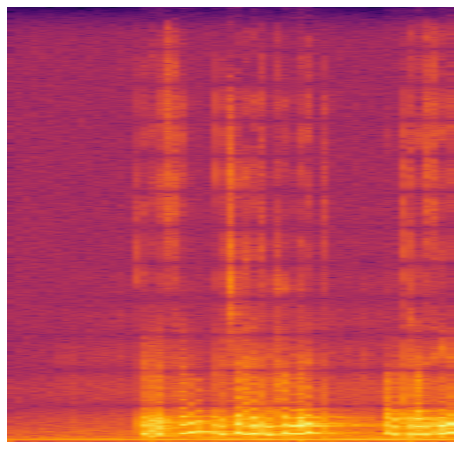

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'Lie'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}'):
        songname = f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')

In [ ]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'Truth'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}'):
        songname = f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [ ]:
filename

'F_121_T.wav'

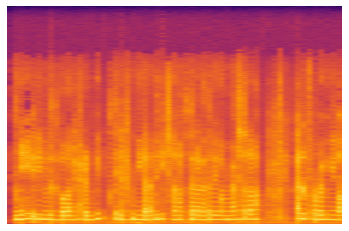

In [ ]:
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [ ]:
Audio(y, rate=sr)

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'Truth'.split()
for g in genres:
    for filename in os.listdir(f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}'):
        songname = f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
df = pd.read_csv('dataset.csv') 

In [ ]:
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,F_004_T.wav,0.289885,0.027299,1444.557321,1828.424076,2600.759274,0.070456,-389.696991,139.883011,23.089058,...,1.448021,1.599489,8.609712,0.833691,-3.493735,-2.547234,-1.025478,-6.546249,-3.087802,Truth
1,F_006_T.wav,0.347685,0.031149,1988.126368,2080.785519,3940.852492,0.101784,-365.008698,105.537720,36.343349,...,0.640740,-15.436500,8.136128,-7.863162,-7.697787,-1.282788,-2.443111,-2.964294,-2.629027,Truth
2,F_007_T.wav,0.326741,0.030368,1503.505022,1916.424481,2849.057772,0.064659,-361.857574,132.252182,23.572750,...,-6.369617,-4.621948,-0.900886,-11.063548,-8.759292,-1.419234,-6.864414,-11.202044,-3.330402,Truth
3,F_008_T.wav,0.368224,0.023203,1889.340555,2332.864679,3876.815805,0.076655,-396.850494,108.990501,26.871569,...,-5.876804,-8.443005,-1.690289,-11.328170,-8.272496,-6.401438,-0.568979,-9.048861,-1.902770,Truth
4,F_009_T.wav,0.419445,0.015676,2295.376816,1999.973378,4545.071541,0.142319,-344.156036,106.589233,-28.218971,...,7.457520,-3.658061,5.995331,-14.130743,-2.833466,8.622726,-9.810339,-0.213566,-2.683476,Truth


In [ ]:
file = open('dataset1.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'Lie'.split()
for g in genres:
    for filename in os.listdir(f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}'):
        songname = f'./drive/MyDrive/Pinocchio_2022/WAV_Data set/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset1.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
df = pd.read_csv('dataset1.csv') 
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,F_007_L.wav,0.333761,0.028448,1546.316205,1906.314697,2878.790926,0.067989,-361.579224,132.911407,19.929497,...,-2.996646,-10.535624,1.916639,-9.811383,-6.144742,-4.637828,-5.373919,-7.666377,-3.246694,Lie
1,F_009_L.wav,0.464886,0.014288,2239.904482,1893.830679,4052.317163,0.137563,-345.245270,104.065247,-42.487617,...,2.684631,1.796442,3.350443,-11.735403,-4.627553,8.348747,-2.290036,-1.238612,-4.065519,Lie
2,F_008_L.wav,0.332043,0.027739,1667.906118,2085.149756,3141.052307,0.069433,-380.921051,121.994873,19.659798,...,-3.611697,-6.598350,-1.730177,-10.880501,-12.111420,-6.770844,-1.488656,-12.052209,-3.345793,Lie
3,F_006_L.wav,0.327924,0.042292,1601.926934,1870.689645,3152.972601,0.077738,-335.031555,130.846512,23.370045,...,-5.184177,-17.046612,6.993602,-10.279875,-7.212373,-4.147550,-2.255552,-3.416893,-5.959107,Lie
4,F_013_L.wav,0.358946,0.046996,2449.960322,2532.660201,4883.707178,0.120514,-327.874268,84.300064,28.746780,...,-6.066545,-6.886714,8.516472,-11.784863,-1.229049,-14.291690,-1.240734,-6.585673,-8.347119,Lie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M_059_L.wav,0.410244,0.030022,1345.172089,1458.082270,2662.821785,0.068752,-386.927460,137.125610,-14.127230,...,-6.205359,-2.733213,-5.154089,-4.275646,-4.554519,-3.545372,-5.490490,3.888800,-3.268455,Lie
96,M_033_L.wav,0.426784,0.053076,1375.179409,1491.513051,2644.539202,0.073123,-323.535553,128.022247,-6.716206,...,-4.391777,-9.210898,-7.633331,3.902494,-4.612779,-5.087374,0.790156,-2.927562,-5.368483,Lie
97,M_056_L.wav,0.462917,0.029491,1164.822130,1441.602290,2122.805093,0.053532,-384.900085,125.506569,14.175809,...,2.720085,2.746852,1.605777,7.806680,-2.180943,-5.652538,-5.568322,-5.998313,-3.289125,Lie
98,M_034_L.wav,0.499571,0.022812,1991.120104,2011.178432,4191.424229,0.111950,-425.665741,89.312950,22.008965,...,-3.164796,1.233471,1.423176,5.200204,-3.070011,-0.648950,-2.821723,-4.972868,1.680232,Lie


In [ ]:
print(to_append)

F_004_L.wav 0.3504983186721802 0.02184523083269596 469.8739962294498 795.2302400486185 647.3627521526703 0.02405465424245356 -525.6558837890625 148.51852416992188 70.36576080322266 25.677223205566406 14.475197792053223 10.590020179748535 -8.879615783691406 -21.156156539916992 -16.812576293945312 -5.083406925201416 8.07452392578125 12.30704116821289 4.200538635253906 -3.8819870948791504 -4.1638360023498535 -2.3803861141204834 -3.0188043117523193 -4.083857536315918 0.3820195496082306 4.10701847076416 Lie


In [ ]:
df = pd.read_csv('dataset.csv') 
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,F_004_T.wav,0.289885,0.027299,1444.557321,1828.424076,2600.759274,0.070456,-389.696991,139.883011,23.089058,...,1.448021,1.599489,8.609712,0.833691,-3.493735,-2.547234,-1.025478,-6.546249,-3.087802,Truth
1,F_006_T.wav,0.347685,0.031149,1988.126368,2080.785519,3940.852492,0.101784,-365.008698,105.537720,36.343349,...,0.640740,-15.436500,8.136128,-7.863162,-7.697787,-1.282788,-2.443111,-2.964294,-2.629027,Truth
2,F_007_T.wav,0.326741,0.030368,1503.505022,1916.424481,2849.057772,0.064659,-361.857574,132.252182,23.572750,...,-6.369617,-4.621948,-0.900886,-11.063548,-8.759292,-1.419234,-6.864414,-11.202044,-3.330402,Truth
3,F_008_T.wav,0.368224,0.023203,1889.340555,2332.864679,3876.815805,0.076655,-396.850494,108.990501,26.871569,...,-5.876804,-8.443005,-1.690289,-11.328170,-8.272496,-6.401438,-0.568979,-9.048861,-1.902770,Truth
4,F_009_T.wav,0.419445,0.015676,2295.376816,1999.973378,4545.071541,0.142319,-344.156036,106.589233,-28.218971,...,7.457520,-3.658061,5.995331,-14.130743,-2.833466,8.622726,-9.810339,-0.213566,-2.683476,Truth


In [ ]:
X = []

In [ ]:
df = pd.read_csv('dataset.csv', index_col=None, header=0)
X.append(df)
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,F_004_T.wav,0.289885,0.027299,1444.557321,1828.424076,2600.759274,0.070456,-389.696991,139.883011,23.089058,...,1.448021,1.599489,8.609712,0.833691,-3.493735,-2.547234,-1.025478,-6.546249,-3.087802,Truth
1,F_006_T.wav,0.347685,0.031149,1988.126368,2080.785519,3940.852492,0.101784,-365.008698,105.537720,36.343349,...,0.640740,-15.436500,8.136128,-7.863162,-7.697787,-1.282788,-2.443111,-2.964294,-2.629027,Truth
2,F_007_T.wav,0.326741,0.030368,1503.505022,1916.424481,2849.057772,0.064659,-361.857574,132.252182,23.572750,...,-6.369617,-4.621948,-0.900886,-11.063548,-8.759292,-1.419234,-6.864414,-11.202044,-3.330402,Truth
3,F_008_T.wav,0.368224,0.023203,1889.340555,2332.864679,3876.815805,0.076655,-396.850494,108.990501,26.871569,...,-5.876804,-8.443005,-1.690289,-11.328170,-8.272496,-6.401438,-0.568979,-9.048861,-1.902770,Truth
4,F_009_T.wav,0.419445,0.015676,2295.376816,1999.973378,4545.071541,0.142319,-344.156036,106.589233,-28.218971,...,7.457520,-3.658061,5.995331,-14.130743,-2.833466,8.622726,-9.810339,-0.213566,-2.683476,Truth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,F_055_T.wav,0.440405,0.010031,1474.363057,1633.026094,3040.854804,0.072212,-419.917786,143.706558,-16.388384,...,-4.585936,-3.903147,5.148688,-9.818776,-5.468455,-0.769995,-9.626451,-0.312341,-8.523579,Truth
97,F_057_T.wav,0.422003,0.007953,1348.463320,1651.439232,2732.358478,0.056500,-492.456573,128.432907,2.904548,...,-1.707705,-3.007666,-5.160466,-4.823302,-5.626075,-1.319391,-3.985715,-2.750405,-3.303978,Truth
98,F_058_T.wav,0.403893,0.014982,1858.914464,1759.876411,3799.243693,0.100487,-421.749237,110.339973,-22.110687,...,-7.278405,-11.120965,5.732979,-4.360634,-11.537963,-1.732596,-6.509258,-4.001946,-4.286867,Truth
99,F_124_T.wav,0.323954,0.028725,1442.080825,1561.609152,2546.928715,0.079759,-388.225616,142.746307,4.828459,...,-2.364709,-9.165955,-12.200797,-5.370324,-14.907146,1.562021,-10.980498,-6.761802,-6.897742,Truth


In [ ]:
df = pd.read_csv('dataset1.csv', index_col=None, header=0)
X.append(df)
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,F_007_L.wav,0.333761,0.028448,1546.316205,1906.314697,2878.790926,0.067989,-361.579224,132.911407,19.929497,...,-2.996646,-10.535624,1.916639,-9.811383,-6.144742,-4.637828,-5.373919,-7.666377,-3.246694,Lie
1,F_009_L.wav,0.464886,0.014288,2239.904482,1893.830679,4052.317163,0.137563,-345.245270,104.065247,-42.487617,...,2.684631,1.796442,3.350443,-11.735403,-4.627553,8.348747,-2.290036,-1.238612,-4.065519,Lie
2,F_008_L.wav,0.332043,0.027739,1667.906118,2085.149756,3141.052307,0.069433,-380.921051,121.994873,19.659798,...,-3.611697,-6.598350,-1.730177,-10.880501,-12.111420,-6.770844,-1.488656,-12.052209,-3.345793,Lie
3,F_006_L.wav,0.327924,0.042292,1601.926934,1870.689645,3152.972601,0.077738,-335.031555,130.846512,23.370045,...,-5.184177,-17.046612,6.993602,-10.279875,-7.212373,-4.147550,-2.255552,-3.416893,-5.959107,Lie
4,F_013_L.wav,0.358946,0.046996,2449.960322,2532.660201,4883.707178,0.120514,-327.874268,84.300064,28.746780,...,-6.066545,-6.886714,8.516472,-11.784863,-1.229049,-14.291690,-1.240734,-6.585673,-8.347119,Lie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M_059_L.wav,0.410244,0.030022,1345.172089,1458.082270,2662.821785,0.068752,-386.927460,137.125610,-14.127230,...,-6.205359,-2.733213,-5.154089,-4.275646,-4.554519,-3.545372,-5.490490,3.888800,-3.268455,Lie
96,M_033_L.wav,0.426784,0.053076,1375.179409,1491.513051,2644.539202,0.073123,-323.535553,128.022247,-6.716206,...,-4.391777,-9.210898,-7.633331,3.902494,-4.612779,-5.087374,0.790156,-2.927562,-5.368483,Lie
97,M_056_L.wav,0.462917,0.029491,1164.822130,1441.602290,2122.805093,0.053532,-384.900085,125.506569,14.175809,...,2.720085,2.746852,1.605777,7.806680,-2.180943,-5.652538,-5.568322,-5.998313,-3.289125,Lie
98,M_034_L.wav,0.499571,0.022812,1991.120104,2011.178432,4191.424229,0.111950,-425.665741,89.312950,22.008965,...,-3.164796,1.233471,1.423176,5.200204,-3.070011,-0.648950,-2.821723,-4.972868,1.680232,Lie


In [ ]:
frame = pd.concat(X) #, axis=0, ignore_index=True)

In [ ]:
frame

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,F_004_T.wav,0.289885,0.027299,1444.557321,1828.424076,2600.759274,0.070456,-389.696991,139.883011,23.089058,...,1.448021,1.599489,8.609712,0.833691,-3.493735,-2.547234,-1.025478,-6.546249,-3.087802,Truth
1,F_006_T.wav,0.347685,0.031149,1988.126368,2080.785519,3940.852492,0.101784,-365.008698,105.537720,36.343349,...,0.640740,-15.436500,8.136128,-7.863162,-7.697787,-1.282788,-2.443111,-2.964294,-2.629027,Truth
2,F_007_T.wav,0.326741,0.030368,1503.505022,1916.424481,2849.057772,0.064659,-361.857574,132.252182,23.572750,...,-6.369617,-4.621948,-0.900886,-11.063548,-8.759292,-1.419234,-6.864414,-11.202044,-3.330402,Truth
3,F_008_T.wav,0.368224,0.023203,1889.340555,2332.864679,3876.815805,0.076655,-396.850494,108.990501,26.871569,...,-5.876804,-8.443005,-1.690289,-11.328170,-8.272496,-6.401438,-0.568979,-9.048861,-1.902770,Truth
4,F_009_T.wav,0.419445,0.015676,2295.376816,1999.973378,4545.071541,0.142319,-344.156036,106.589233,-28.218971,...,7.457520,-3.658061,5.995331,-14.130743,-2.833466,8.622726,-9.810339,-0.213566,-2.683476,Truth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M_059_L.wav,0.410244,0.030022,1345.172089,1458.082270,2662.821785,0.068752,-386.927460,137.125610,-14.127230,...,-6.205359,-2.733213,-5.154089,-4.275646,-4.554519,-3.545372,-5.490490,3.888800,-3.268455,Lie
96,M_033_L.wav,0.426784,0.053076,1375.179409,1491.513051,2644.539202,0.073123,-323.535553,128.022247,-6.716206,...,-4.391777,-9.210898,-7.633331,3.902494,-4.612779,-5.087374,0.790156,-2.927562,-5.368483,Lie
97,M_056_L.wav,0.462917,0.029491,1164.822130,1441.602290,2122.805093,0.053532,-384.900085,125.506569,14.175809,...,2.720085,2.746852,1.605777,7.806680,-2.180943,-5.652538,-5.568322,-5.998313,-3.289125,Lie
98,M_034_L.wav,0.499571,0.022812,1991.120104,2011.178432,4191.424229,0.111950,-425.665741,89.312950,22.008965,...,-3.164796,1.233471,1.423176,5.200204,-3.070011,-0.648950,-2.821723,-4.972868,1.680232,Lie


In [ ]:
#data = pd.read_csv('dataset.csv')
data= frame
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()   # the figure of CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 2.3993 - accuracy: 0.0375
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 2.0216 - accuracy: 0.4500
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 1.7164 - accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 1.4454 - accuracy: 0.5750
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 1.2065 - accuracy: 0.6062
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0111 - accuracy: 0.6125
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8632 - accuracy: 0.6187
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7617 - accuracy: 0.6562
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7022 - accuracy: 0.6438
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.6375
Epoch 11/100
2/2 [==========

KeyError: ignored

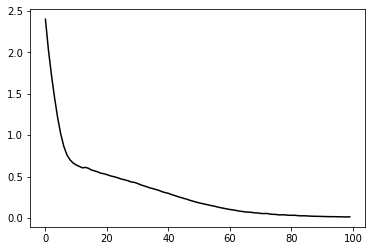

In [ ]:
plt.figure()
plt.plot(classifier.history["loss"],label = "Train Loss", color = "black")
plt.plot(classifier.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 3.3746 - accuracy: 0.2927


# sgd

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               6912      
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 10)               

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=1000,
                    batch_size=128)

Epoch 1/1000
2/2 [==============================] - 2s 12ms/step - loss: 2.2975 - accuracy: 0.0625
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9746 - accuracy: 0.4250
Epoch 3/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3147 - accuracy: 0.4938
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.8658 - accuracy: 0.5500
Epoch 5/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.7884 - accuracy: 0.5437
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.6500
Epoch 7/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.6187
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.0334 - accuracy: 0.5063
Epoch 9/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.6446 - accuracy: 0.6438
Epoch 10/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.6935 - accuracy: 0.5688
Epoch 11/1000

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 14.3396 - accuracy: 0.3659
